# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

Import the necessary libraries and create your dataframe(s).

## COVID-19 EDA USING WHO DATA (Sourced June 2022)

**VACCINATION RATE VS. DEATH RATES**


**My data came directly from the** [WHO CORONAVIRUS DASHBOARD](https://covid19.who.int/data)


**Two datasets were used for analysis:**

[THE COVID19 GLOBAL TABLE DATA](https://covid19.who.int/WHO-COVID-19-global-table-data.csv)

[COVID19 VACCINATION DATA](https://covid19.who.int/who-data/vaccination-data.csv)  


<br/><br/>

**<font color=darkred> DATA DICTIONARY</FONT>**

**Latest reported counts of cases and deaths**

Download link: https://covid19.who.int/WHO-COVID-19-global-table-data.csv


| Field name                                                   | Type    | Description                                                                                                                                                      |
| ------------------------------------------------------------ | ------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Name                                                         | String  | Country, territory, area                                                                                                                                         |
| WHO\_region                                                  | String  | WHO Region                                                                                                                                                       |
| Cases - cumulative total                                     | Integer | Cumulative confirmed cases reported to WHO to date.                                                                                                              |
| Cases - cumulative total per 100000 population               | Decimal | Cumulative confirmed cases reported to WHO to date per 100,000 population.                                                                                       |
| Cases - newly reported in last 7 days                        | Integer | New confirmed cases reported in the last 7 days. Calculated by subtracting previous cumulative case count (8 days prior) from current cumulative cases count.    |
| Cases - newly reported in last 7 days per 100000 population  | Decimal | New confirmed cases reported in the last 7 days per 100,000 population.                                                                                          |
| Cases - newly reported in last 24 hours                      | Integer | New confirmed cases reported in the last 24 hours. Calculated by subtracting previous cumulative case count from current cumulative cases count.                 |
| Deaths - cumulative total                                    | Integer | Cumulative confirmed deaths reported to WHO to date.                                                                                                             |
| Deaths - cumulative total per 100000 population              | Decimal | Cumulative confirmed deaths reported to WHO to date per 100,000 population.                                                                                      |
| Deaths - newly reported in last 7 days                       | Integer | New confirmed deaths reported in the last 7 days. Calculated by subtracting previous cumulative death count (8 days prior) from current cumulative deaths count. |
| Deaths - newly reported in last 7 days per 100000 population | Decimal | New confirmed deaths reported in the last 7 days per 100,000 population.                                                                                         |
| Deaths - newly reported in last 24 hours                     | Integer | New confirmed deaths reported in the last 24 hours. Calculated by subtracting previous cumulative death count from current cumulative deaths count.              |


<br/><br/>

**Vaccination data**

Download links: https://covid19.who.int/who-data/vaccination-data.csv




| Field name                               | Type    | Description                                                                                                                                                                                                                                                                                                                                     |
| ---------------------------------------- | ------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| COUNTRY                                  | String  | Country, territory, area                                                                                                                                                                                                                                                                                                                        |
| ISO3                                     | String  | ISO Alpha-3 country code                                                                                                                                                                                                                                                                                                                        |
| WHO\_REGION                              | String  | WHO regional offices: WHO Member States are grouped into six WHO regions: Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO). |
| DATA\_SOURCE                             | String  | Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations                                                                                                                                                 |
| DATE\_UPDATED                            | Date    | Date of last update                                                                                                                                                                                                                                                                                                                             |
| TOTAL\_VACCINATIONS                      | Integer | Cumulative total vaccine doses administered                                                                                                                                                                                                                                                                                                     |
| PERSONS\_VACCINATED\_1PLUS\_DOSE         | Decimal | Cumulative number of persons vaccinated with at least one dose                                                                                                                                                                                                                                                                                  |
| TOTAL\_VACCINATIONS\_PER100              | Integer | Cumulative total vaccine doses administered per 100 population                                                                                                                                                                                                                                                                                  |
| PERSONS\_VACCINATED\_1PLUS\_DOSE\_PER100 | Decimal | Cumulative persons vaccinated with at least one dose per 100 population                                                                                                                                                                                                                                                                         |
| PERSONS\_FULLY\_VACCINATED               | Integer | Cumulative number of persons fully vaccinated                                                                                                                                                                                                                                                                                                   |
| PERSONS\_FULLY\_VACCINATED\_PER100       | Decimal | Cumulative number of persons fully vaccinated per 100 population                                                                                                                                                                                                                                                                                |
| VACCINES\_USED                           | String  | Combined short name of vaccine: “Company - Product name” (see below)                                                                                                                                                                                                                                                                            |
| FIRST\_VACCINE\_DATE                     | Date    | Date of first vaccinations. Equivalent to start/launch date of the first vaccine administered in a country.                                                                                                                                                                                                                                     |
| NUMBER\_VACCINES\_TYPES\_USED            | Integer | Number of vaccine types used per country, territory, area                                                                                                                                                                                                                                                                                       |
| PERSONS\_BOOSTER\_ADD\_DOSE              | Integer | Persons received booster or additional dose                                                                                                                                                                                                                                                                                                     |
| PERSONS\_BOOSTER\_ADD\_DOSE\_PER100      | Decimal | Persons received booster or additional dose per 100 population                                                                                                                                                                                                                                                                                  |

In [1]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib
from nltk.metrics import edit_distance
import missingno as msno
import pandas_profiling as pp

# Visualization Imports
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import numpy as np


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#Print multiple outputs from 1 cell

pd.set_option('display.max_columns', None)

In [2]:
#Import CSVs

vacc_data=pd.read_csv(r"C:\Users\holly\Desktop\DAExercises\0 graded Assignment 4\WHO data\Core Data\vaccination-data.csv")
covid_stats=pd.read_csv(r"C:\Users\holly\Desktop\DAExercises\0 graded Assignment 4\WHO data\Core Data\WHO-COVID-19-global-table-data.csv")

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [3]:
#percentage of missing data for each column and data set:
print('Vaccine data missing percentage-rounded \n')

for col in vacc_data.columns:
    vacc_missing = np.mean(vacc_data[col].isnull()) #use numpy to find the mean of null values in each column
    print('{} - {}%'.format(col, (vacc_missing*100).round(2)))
 

print('\n Covid stats missing percentage-rounded')   
    
for col in covid_stats.columns:
    stats_missing = np.mean(covid_stats[col].isnull()) #use numpy to find the mean of null values in each column
    print('{} - {}%'.format(col,( stats_missing*100).round(2)))
       

Vaccine data missing percentage-rounded 

COUNTRY - 0.0%
ISO3 - 0.0%
WHO_REGION - 0.0%
DATA_SOURCE - 0.0%
DATE_UPDATED - 0.0%
TOTAL_VACCINATIONS - 0.0%
PERSONS_VACCINATED_1PLUS_DOSE - 0.44%
TOTAL_VACCINATIONS_PER100 - 0.0%
PERSONS_VACCINATED_1PLUS_DOSE_PER100 - 0.44%
PERSONS_FULLY_VACCINATED - 0.44%
PERSONS_FULLY_VACCINATED_PER100 - 0.44%
VACCINES_USED - 1.32%
FIRST_VACCINE_DATE - 9.21%
NUMBER_VACCINES_TYPES_USED - 1.32%
PERSONS_BOOSTER_ADD_DOSE - 14.04%
PERSONS_BOOSTER_ADD_DOSE_PER100 - 14.04%

 Covid stats missing percentage-rounded
Name - 0.0%
WHO Region - 0.42%
Cases - cumulative total - 0.0%
Cases - cumulative total per 100000 population - 0.42%
Cases - newly reported in last 7 days - 0.0%
Cases - newly reported in last 7 days per 100000 population - 0.42%
Cases - newly reported in last 24 hours - 0.0%
Deaths - cumulative total - 0.0%
Deaths - cumulative total per 100000 population - 0.42%
Deaths - newly reported in last 7 days - 0.0%
Deaths - newly reported in last 7 days per 100

In [4]:
#Sum of missing data

vacc_data.isnull().sum()

print('\n')

covid_stats.isnull().sum()

COUNTRY                                  0
ISO3                                     0
WHO_REGION                               0
DATA_SOURCE                              0
DATE_UPDATED                             0
TOTAL_VACCINATIONS                       0
PERSONS_VACCINATED_1PLUS_DOSE            1
TOTAL_VACCINATIONS_PER100                0
PERSONS_VACCINATED_1PLUS_DOSE_PER100     1
PERSONS_FULLY_VACCINATED                 1
PERSONS_FULLY_VACCINATED_PER100          1
VACCINES_USED                            3
FIRST_VACCINE_DATE                      21
NUMBER_VACCINES_TYPES_USED               3
PERSONS_BOOSTER_ADD_DOSE                32
PERSONS_BOOSTER_ADD_DOSE_PER100         32
dtype: int64

Name                                                            0
WHO Region                                                      1
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  1
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     1
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 1
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    1
Deaths - newly reported in last 24 hours                        0
dtype: int64

### Heat map of missing vaccine data

The use of heatmaps is to verify and visualize the missing data output above

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

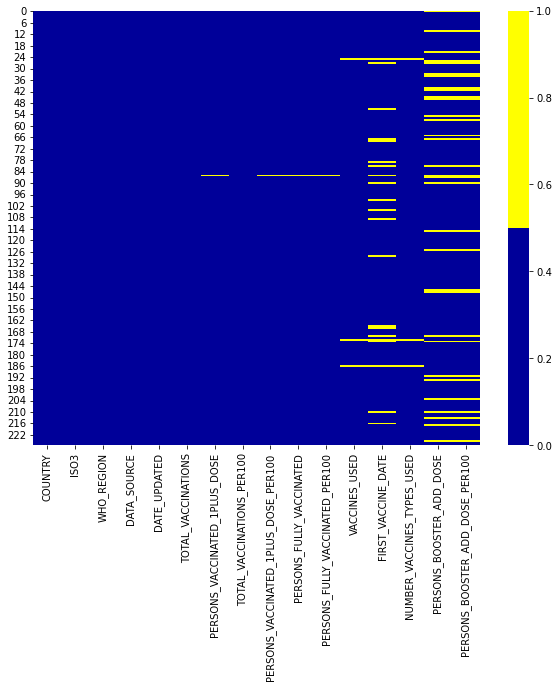

In [5]:
plt.figure(figsize=(10,8))

cols = vacc_data.columns
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(vacc_data[cols].isna(), cmap=sns.color_palette(colours))

### Heat map of missing covid stats data

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

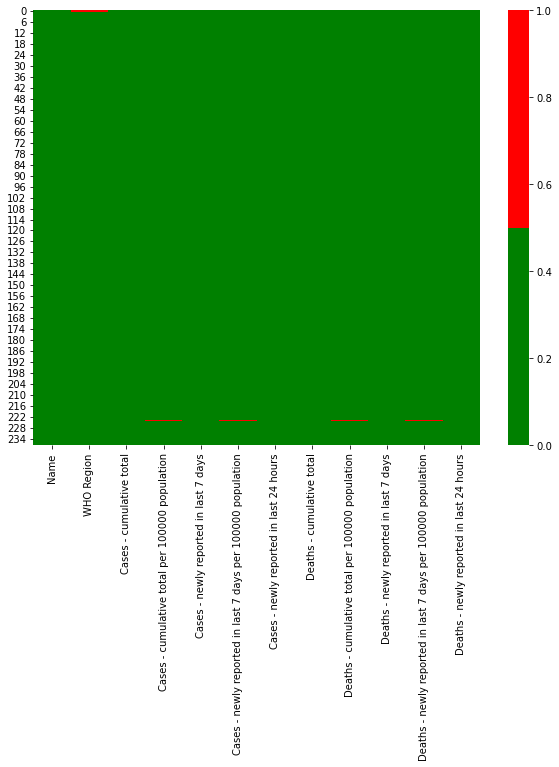

In [6]:
plt.figure(figsize=(10,8))

col = covid_stats.columns
colours = ['green', 'red'] # specify colours: red - missing. green - not missing
sns.heatmap(covid_stats[col].isna(), cmap=sns.color_palette(colours))

In [7]:
# vacc_data.loc[vacc_data['COUNTRY'] == 'Other']

# pd.set_option('display.max_rows', None)

# covid_stats['Name'].value_counts

### Taking a closer look at rows with missing data to see how best to address them

In [8]:
#Vaccination dataset

vacc_data[vacc_data.isna().any(axis=1)]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,01/06/2022,6171652,5456919.0,15.854,14.018,4807917.0,12.351,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",22/02/2021,11.0,NaN,NaN
10,Aruba,ABW,AMRO,REPORTING,03/06/2022,171243,88853.0,160.391,83.222,82390.0,77.169,"Janssen - Ad26.COV 2-S,Pfizer BioNTech - Comir...",17/02/2021,2.0,NaN,NaN
21,Benin,BEN,AFRO,REPORTING,05/06/2022,4156907,3638324.0,34.289,30.011,2690085.0,22.190,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",29/03/2021,5.0,NaN,NaN
25,Bonaire,XAA,AMRO,REPORTING,03/06/2022,41250,17523.0,197.227,83.782,15841.0,75.740,NaN,NaN,NaN,7886.0,37.705
26,"Bonaire, Sint Eustatius and Saba",BES,AMRO,REPORTING,09/04/2021,7391,5726.0,28.441,22.034,2965.0,11.410,"Moderna - Spikevax,Pfizer BioNTech - Comirnaty",22/02/2021,2.0,NaN,NaN
27,Bosnia and Herzegovina,BIH,EURO,REPORTING,29/01/2022,1924950,943394.0,58.700,28.755,846080.0,25.789,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",NaN,4.0,NaN,NaN
33,Burkina Faso,BFA,AFRO,REPORTING,05/06/2022,2947562,2449746.0,14.101,11.719,1555077.0,7.439,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",02/06/2021,3.0,NaN,NaN
34,Burundi,BDI,AFRO,REPORTING,05/06/2022,16232,14388.0,0.137,0.121,13811.0,0.116,Beijing CNBG - BBIBP-CorV,18/10/2021,1.0,NaN,NaN
40,Central African Republic,CAF,AFRO,REPORTING,05/06/2022,1193681,1101130.0,24.715,22.799,1044746.0,21.631,"Bharat - Covaxin,SII - Covishield",19/03/2021,2.0,NaN,NaN
41,Chad,TCD,AFRO,REPORTING,05/06/2022,2355126,2216437.0,14.338,13.494,2091466.0,12.733,Beijing CNBG - BBIBP-CorV,04/06/2021,1.0,NaN,NaN


### For this dataset, total vaccinations and fully vaccinated statistics are most important for analysis, so I will drop the columns with the highest percentage of missing data since I won't be using them for further analysis:
<br>

* FIRST_VACCINE_DATE - 9%
* PERSONS_BOOSTER_ADD_DOSE - 14%
* PERSONS_BOOSTER_ADD_DOSE_PER100 - 14%

**Filling Vaccines_Used missing data with "Unreported".**

In [9]:
#make a copy of dataset
df_vacc = vacc_data.copy()

#Set index to 'COUNTRY'
df_vacc = df_vacc.set_index("COUNTRY")
#df_vacc.head()


#Fill Vaccines_Used
df_vacc['VACCINES_USED']=df_vacc['VACCINES_USED'].fillna('Unreported')



In [10]:
#Dropping columns
vacc_missing=df_vacc.isna().mean().round(2)

vacc_missing[vacc_missing >.08]



FIRST_VACCINE_DATE                 0.09
PERSONS_BOOSTER_ADD_DOSE           0.14
PERSONS_BOOSTER_ADD_DOSE_PER100    0.14
dtype: float64

In [11]:
df_vacc=df_vacc.drop(columns=vacc_missing[vacc_missing >.08].index)


In [12]:
df_vacc.isnull().sum()

#Rechecking rows that contain missing data (I will leave these as is for now) 
df_vacc[df_vacc.isna().any(axis=1)]

ISO3                                    0
WHO_REGION                              0
DATA_SOURCE                             0
DATE_UPDATED                            0
TOTAL_VACCINATIONS                      0
PERSONS_VACCINATED_1PLUS_DOSE           1
TOTAL_VACCINATIONS_PER100               0
PERSONS_VACCINATED_1PLUS_DOSE_PER100    1
PERSONS_FULLY_VACCINATED                1
PERSONS_FULLY_VACCINATED_PER100         1
VACCINES_USED                           0
NUMBER_VACCINES_TYPES_USED              3
dtype: int64

,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED
COUNTRY,,,,,,,,,,,,
Bonaire,XAA,AMRO,REPORTING,03/06/2022,41250,17523.0,197.227,83.782,15841.0,75.740,Unreported,NaN
Guernsey,GGY,EURO,OWID,01/06/2022,156415,NaN,242.624,NaN,NaN,NaN,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",3.0
Saba,XCA,AMRO,REPORTING,03/06/2022,4270,1594.0,220.900,82.462,1577.0,81.583,Unreported,NaN
Sint Eustatius,XBA,AMRO,REPORTING,03/06/2022,4325,1791.0,137.783,57.056,1686.0,53.711,Unreported,NaN


**Data set 2- check for missing data**

In [13]:
#Covid stats data set
covid_stats[covid_stats.isna().any(axis=1)]

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,534495291,6857.303528,3485948,44.722945,571825,6311088,80.968059,8591,0.110218,1082
224,Other,Other,764,NaN,0,NaN,0,13,NaN,0,NaN,0


### Dropping Row with 'Other' country name because it has too much missing data and does not tell me anything about specific country or region statistics. Also filling WHO region under Global with 'Global'

In [14]:
#make a copy of dataset
df_covidstats = covid_stats.copy()

#Set index to 'Name'
df_covidstats = df_covidstats.set_index("Name")
#df_covidstats.head()

#Drop "Other"
df_covidstats = df_covidstats.drop("Other")


#Fill Region 
df_covidstats = df_covidstats.fillna('Global')



In [15]:
df_covidstats.isnull().sum()
#no more null values in dataset 2

WHO Region                                                      0
Cases - cumulative total                                        0
Cases - cumulative total per 100000 population                  0
Cases - newly reported in last 7 days                           0
Cases - newly reported in last 7 days per 100000 population     0
Cases - newly reported in last 24 hours                         0
Deaths - cumulative total                                       0
Deaths - cumulative total per 100000 population                 0
Deaths - newly reported in last 7 days                          0
Deaths - newly reported in last 7 days per 100000 population    0
Deaths - newly reported in last 24 hours                        0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

#### To check for irregular data I will be looking at two columns in dataset 1:

* TOTAL_VACCINATIONS_PER100 
* PERSONS_FULLY_VACCINATED_PER100

**For dataset 2, I will be looking at:** 

* Cases - cumulative total per 100000 population 
* Deaths - cumulative total per 100000 population    


**By using the columns with rates, this provides a meaningful way to compare data across population groups of different sizes.**

In [16]:
#df_vacc.kurt(numeric_only=True)
df_vacc.describe()[['TOTAL_VACCINATIONS_PER100', 'PERSONS_FULLY_VACCINATED_PER100']]

,TOTAL_VACCINATIONS_PER100,PERSONS_FULLY_VACCINATED_PER100
count,228.00000,227.000000
mean,135.09814,53.272366
std,77.47055,26.659387
min,0.13700,0.116000
25%,71.12500,31.972500
50%,138.39250,58.981000
75%,202.58600,74.913000
max,355.74800,122.944000


In [17]:
#Reset index

df_vacc=df_vacc.reset_index()

df_covidstats=df_covidstats.reset_index()


#df_vacc.head()

In [32]:
#Using .info to find column index number to customize data
df_vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATE_UPDATED                          228 non-null    object 
 4   TOTAL_VACCINATIONS                    228 non-null    int64  
 5   PERSONS_VACCINATED_1PLUS_DOSE         227 non-null    float64
 6   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 7   PERSONS_VACCINATED_1PLUS_DOSE_PER100  227 non-null    float64
 8   PERSONS_FULLY_VACCINATED              227 non-null    float64
 9   PERSONS_FULLY_VACCINATED_PER100       227 non-null    float64
 10  VACCINES_USED                         228 non-null    object 
 11  NUMBER_VACCINES_TYP

#### <font color= red> NB The following plots were made with plotly express. They are interactive and display data when hovering over the data points. This does not seem to show on github, so static images are included after each plot and png files of the plots can be found in the folder "Violin Plots"</font>.


In [33]:
fig = px.violin(df_vacc['TOTAL_VACCINATIONS_PER100'], y="TOTAL_VACCINATIONS_PER100", box=True, points='all', title="Total Vaccinations Per 100")
fig.update_traces(fillcolor='seagreen', line_color='black', customdata=df_vacc, hovertemplate ='%{customdata[0]}<br>%{customdata[6]}') 
fig.show()


#Gibraltar, (355.74), Cuba(321.91) and Chile (297.64) have the top three highest value points 
#but they follow the general trend of the dataset so won't be considered outliers that need to be removed.
# In the violin plot, the wider the section, the greater the probability that members of the population will take the given value;
#in the skinnier section, the lower the probability. Which means that most countries follow a trend of having higher vaccination rates per 100 than lower vaccination rates.


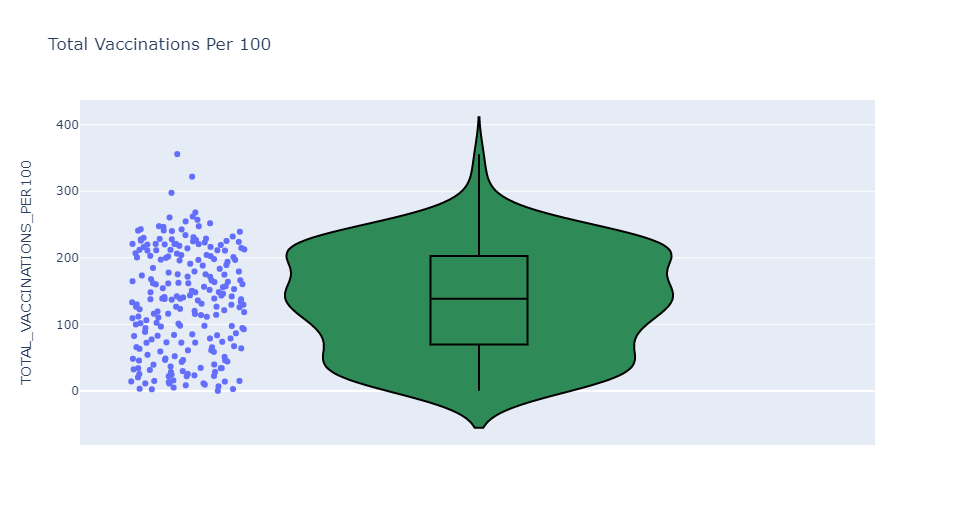

**Dataset 2**

In [21]:
#df_covidstats.kurt(numeric_only=True)
df_covidstats.describe()[['Cases - cumulative total per 100000 population', 'Deaths - cumulative total per 100000 population']]

,Cases - cumulative total per 100000 population,Deaths - cumulative total per 100000 population
count,237.000000,237.000000
mean,15954.805593,113.529595
std,16331.414183,120.332178
min,0.000000,0.000000
25%,1186.863000,13.754000
50%,10893.582000,73.847000
75%,27005.418000,174.253000
max,70926.021000,647.031000


In [38]:
#Using .info to find column index number to customize data
#df_covidstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          237 non-null    object 
 1   WHO Region                                                    237 non-null    object 
 2   Cases - cumulative total                                      237 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         237 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       237 non-null    int64  
 7   Deaths - cumulative total                                     237 non-n

In [35]:
fig = px.violin(df_covidstats['Cases - cumulative total per 100000 population'], y="Cases - cumulative total per 100000 population", box=True, points='all', title="Cases - cumulative total per 100,000 population")
fig.update_traces(fillcolor='orange', line_color='black', customdata=df_covidstats, hovertemplate ='%{customdata[0]}<br>%{customdata[3]}')
fig.show()

#Faroe Islands has the highest value point in the violin plot for cumulative cases per 100,000 (70,926.02). 
#This is an interesting data point that is worth further investigation to determine the underlying reason for this
# In the violin plot, the wider the section, the greater the probability that members of the population will take the given value; 
#in the skinnier section, the lower the probability. A significant number of data points are concentrated towards the 
#lower end of the plot, signifying lower number of cases per 100,000 for a number of countries.

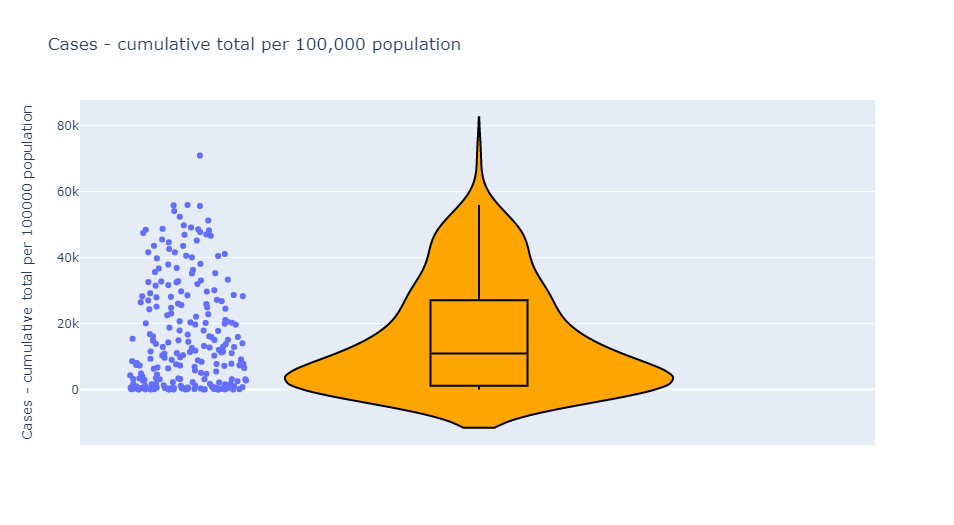

In [37]:
fig = px.violin(df_covidstats['Deaths - cumulative total per 100000 population'], y="Deaths - cumulative total per 100000 population", box=True, points='all', title="Deaths - cumulative total per 100,000 population")
fig.update_traces(fillcolor='red', line_color='black', customdata=df_covidstats, hovertemplate ='%{customdata[0]}<br>%{customdata[8]}')
fig.show()

#Peru has the highest value data point for cumulative deaths per 100,000 (647.03).
#This is worth exploring further
#Most of the other data points are accumulated towards the lower end of the violin plot signifying that a large number of countries recorded relatively lower death rates than others.

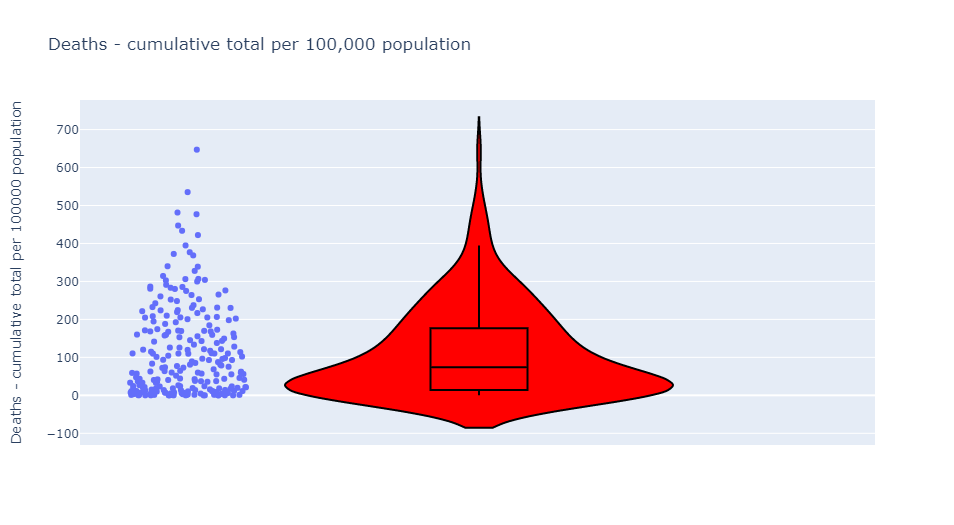



### Both datasets contain max values that are significantly higher than the rest of the dataset. This can be considered as potential outliers. However I will leave them in for further analysis as this information can be useful when comparing cases, death rates and vaccination rates together. These max values can be legitimate observations and I believe it is important to investigate them further to see if I can gain insight on the nature of the outliers.


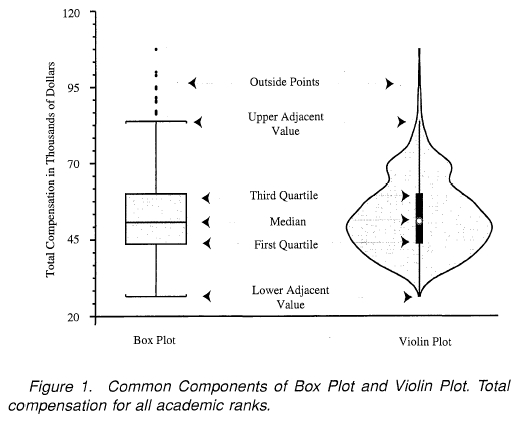

Source: [Toward Data Science-Violin Plots Explained](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

NB-The figure is for my future reference when interpreting box and violin plots

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

### Checking for Duplicates

In [25]:
df_vacc[df_vacc.duplicated()]
#no duplicates in first dataset

df_covidstats[df_covidstats.duplicated()]

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,NUMBER_VACCINES_TYPES_USED


,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours


verifying duplicates

In [26]:
#df_covidstats.loc[['Tokelau']]

#Checking for duplicates
duplicate_rows_df = df_covidstats[df_covidstats.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

#1 row and 11 columns duplicated in dataset 2

Number of duplicated rows:  (0, 12)


Dropping duplicates

In [27]:
# Dropping the duplicates then rechecking
df_covidstats = df_covidstats.drop_duplicates()

df_covidstats[df_covidstats.duplicated()]

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours


### Checking for columns with 95% or more of the same data

In [28]:
num_rows = len(df_vacc.index)
low_information_cols = [] #

for col in df_vacc.columns:
    cnts = df_vacc[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
#-------------------------------        
        
num_rows = len(df_covidstats.index)
low_information_cols = [] #

for col in df_covidstats.columns:
    cnts = df_covidstats[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
        
        
#No columns in dataset 2 have a high percentage(>=95%) of the same values.       

DATA_SOURCE: 95.61404%
REPORTING    218
OWID          10
Name: DATA_SOURCE, dtype: int64



Data source- Whether or not it was reported by the country or sourced from OWID (Our World In Data). 

### I won't be using the DATA_SOURCE column for further analysis. Since the data is repetitive/ uninformative for the context of this project, I will drop it.

In [29]:
#df_vacc.loc[df_vacc['DATA_SOURCE'] == 'OWID']

df_vacc = df_vacc.drop(["DATA_SOURCE"], axis=1)

#Rechecking the dataset to ensure column was dropped
df_vacc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATE_UPDATED                          228 non-null    object 
 4   TOTAL_VACCINATIONS                    228 non-null    int64  
 5   PERSONS_VACCINATED_1PLUS_DOSE         227 non-null    float64
 6   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 7   PERSONS_VACCINATED_1PLUS_DOSE_PER100  227 non-null    float64
 8   PERSONS_FULLY_VACCINATED              227 non-null    float64
 9   PERSONS_FULLY_VACCINATED_PER100       227 non-null    float64
 10  VACCINES_USED                         228 non-null    object 
 11  NUMBER_VACCINES_TYP

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [30]:
# No inconsistent data spotted as yet

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

* **No inconsistent data was spotted at this stage. I opted to fill/remove some of the missing data and remove some of the unnecessary data. However, I kept all of the irregular data. I believe there is a story behind the countries that are outliers in terms of max number of cases, death rates and vaccination rates and I would like to explore that further.**

2. Did the process of cleaning your data give you new insights into your dataset?

* **I was surprised to find that Cuba was one of the outliers in terms of vaccination rates per 100 of the population and that Peru was the outlier in terms of death rates per 100, 000 of the population. The latter was particularly intriguing since Europe as a region had the highest death rates in my previous EDA. I was expecting the most extreme outlier to be from there.**

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

* **Moving forward I would like to start comparing the datasets together to get a better idea of how vaccination rates impact number of cases and death rates.**

In [39]:
#Exporting Cleaned Datasets

# df_vacc.to_csv("vaccinedata.csv")

# df_covidstats.to_csv("globalcovidstatistics.csv")